# Predicting Temperatures using Recurrent Neural Networks


<div style="background-color: #f0f8ff; border: 2px solid #4682b4; padding: 10px;">
<a href="https://colab.research.google.com/github/DeepTrackAI/DeepLearningCrashCourse/blob/main/Ch07_RNN/ec07_1_rnn/rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
<strong>If using Colab/Kaggle:</strong> You need to uncomment the code in the cell below this one.
You need also to copy the "jena_climate_2009_2016.csv" file from the
<a href="https://github.com/DeepTrackAI/DeepLearningCrashCourse/tree/main/Ch07_RNN/ec07_1_rnn">notebook folder</a> in GitHub to the Colab/Kaggle work directory.
</div>

In [1]:
!pip install deeplay deeptrack  # Uncomment if using Colab/Kaggle.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.3/177.3 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.6/195.6 kB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 121.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:0

This notebook provides you with a complete code example that uses different kinds of recurrent neural networks to predict the temperature in the Jena Climate Dataset.

<div style="background-color: #f0f8ff; border: 2px solid #4682b4; padding: 10px;">
<strong>Note:</strong> This notebook contains the Code Example 7-1 from the book  

**Deep Learning Crash Course**  
Benjamin Midtvedt, Jesús Pineda, Henrik Klein Moberg, Harshith Bachimanchi, Joana B. Pereira, Carlo Manzo, Giovanni Volpe  
No Starch Press, San Francisco (CA), 2025  
ISBN-13: 9781718503922  

[https://nostarch.com/deep-learning-crash-course](https://nostarch.com/deep-learning-crash-course)

You can find the other notebooks on the [Deep Learning Crash Course GitHub page](https://github.com/DeepTrackAI/DeepLearningCrashCourse).
</div>

## Understanding Recurrent Relations

Implement a comb filter ...

In [2]:
input_series = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

hidden_state, U, V = 0, 0.5, 0.5

output_series = []
for input_data in input_series:
    hidden_state = U * input_data + V * hidden_state
    output_data = hidden_state
    output_series.append(output_data)

print(f"Output Series: {[f'{x:.2f}' for x in output_series]}")

Output Series: ['0.00', '0.00', '0.00', '0.00', '0.50', '0.75', '0.88', '0.94', '0.97', '0.98', '0.99', '1.00', '0.50', '0.25', '0.12', '0.06', '0.03', '0.02', '0.01', '0.00']


... and transform it into a simple recurrent neural network (which generates some meaningless output because of the random initialization of its weights).

In [3]:
import numpy as np

def sigmoid(x):
    """Simple implementation of sigmoid function."""
    return 1 / (1 + np.exp(-x))

input_series = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

hidden_state = 0
U, V, W, b = np.random.normal(size=4)

output_series = []
for input_data in input_series:
    hidden_state = sigmoid(U * input_data + V * hidden_state + b)
    output_data = sigmoid(W * hidden_state)
    output_series.append(output_data)

print(f"Output Series: {[f'{x:.2f}' for x in output_series]}")

Output Series: ['0.25', '0.23', '0.22', '0.22', '0.28', '0.29', '0.30', '0.30', '0.30', '0.30', '0.30', '0.30', '0.23', '0.22', '0.22', '0.22', '0.22', '0.22', '0.22', '0.22']


In [4]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive/HW4')

Mounted at /content/drive


## Downloading the Jena Climate Dataset

This dataset contains timeseries recorded at the weather station of the Max Planck Institute for Biogeochemistry in Jena, Germany. It’s made up of 14 different quantities recorded every 10 minutes over several years, from January 1st 2009 to December 31st 2016.

Load the Jena Climante Dataset ...

In [5]:
import pandas as pd

dataframe = pd.read_csv("jena_climate_2009_2016.csv", index_col=0)
data = dataframe.values
header = dataframe.columns.tolist()

... and display its header and first few elements.

In [6]:
print(dataframe.head())

                     p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
Date Time                                                                
01.01.2009 00:10:00    996.52     -8.02    265.40        -8.90    93.3   
01.01.2009 00:20:00    996.57     -8.41    265.01        -9.28    93.4   
01.01.2009 00:30:00    996.53     -8.51    264.91        -9.31    93.9   
01.01.2009 00:40:00    996.51     -8.31    265.12        -9.07    94.2   
01.01.2009 00:50:00    996.51     -8.27    265.15        -9.04    94.1   

                     VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  \
Date Time                                                                  
01.01.2009 00:10:00          3.33          3.11          0.22       1.94   
01.01.2009 00:20:00          3.23          3.02          0.21       1.89   
01.01.2009 00:30:00          3.21          3.01          0.20       1.88   
01.01.2009 00:40:00          3.26          3.07          0.19       1.92   
01.01.2009 00:50:00      

### Visualizing the Data

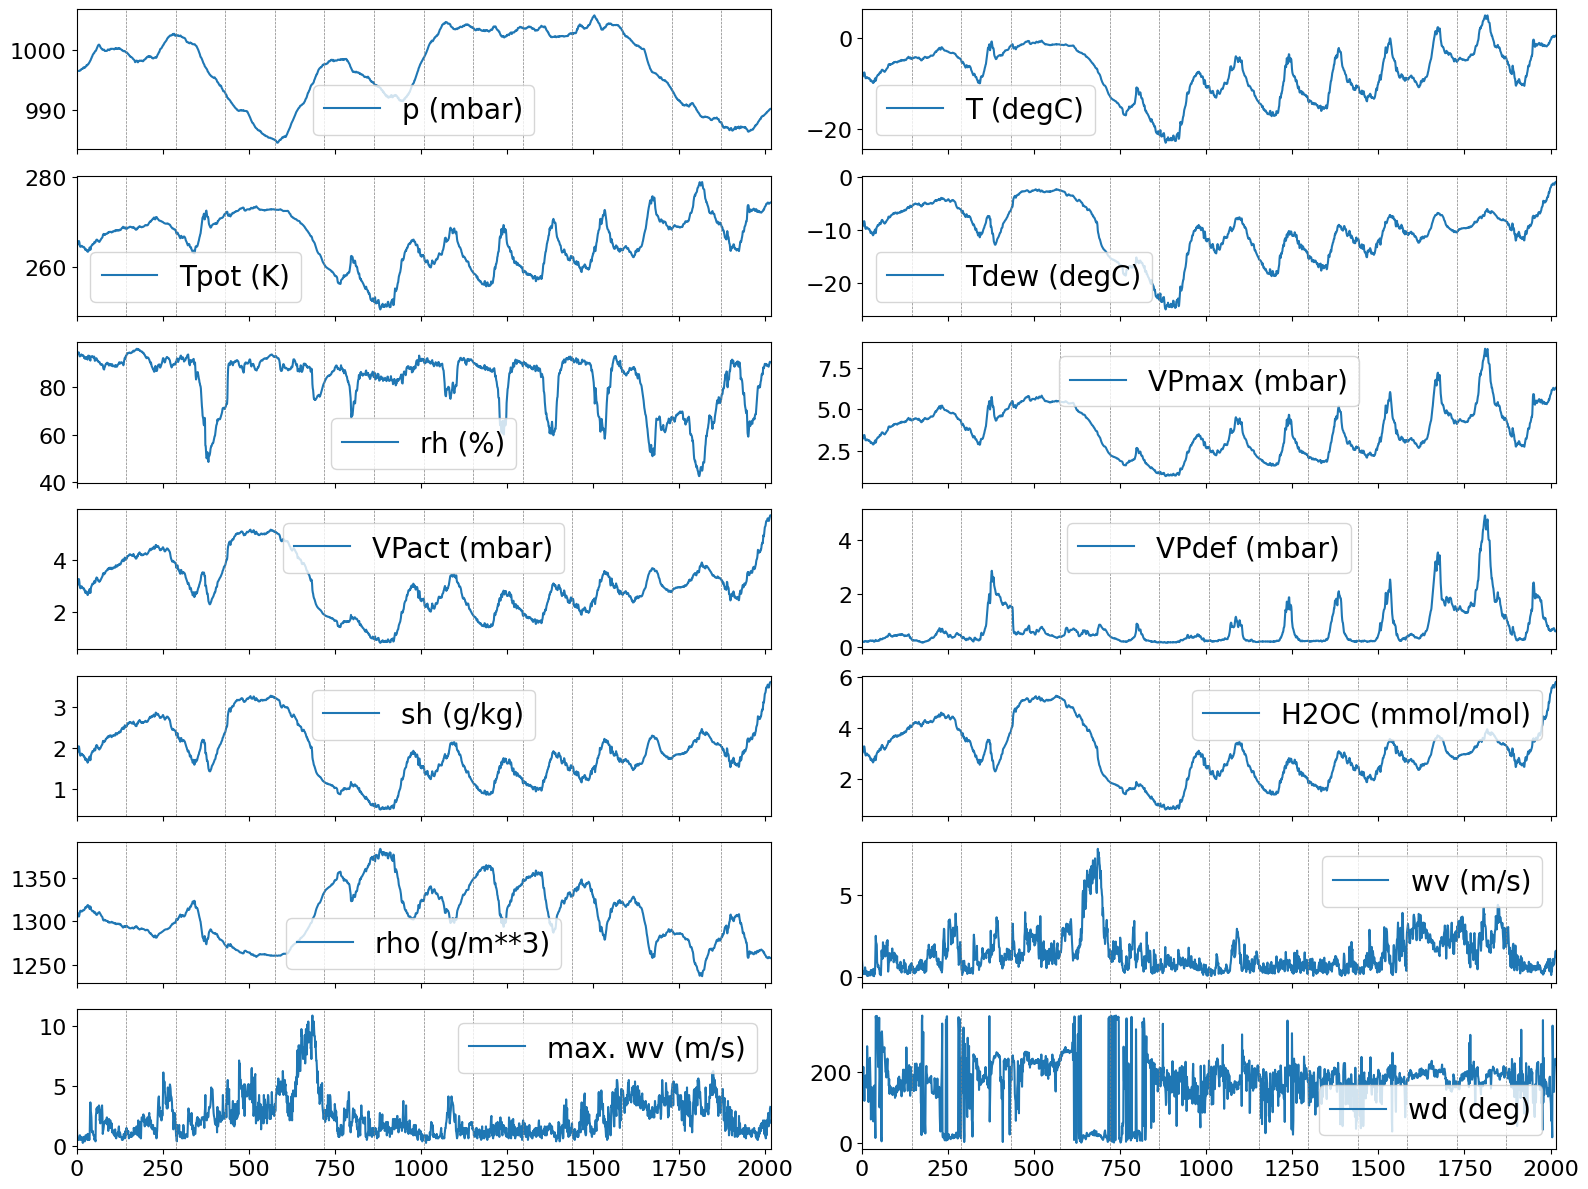

In [7]:
import matplotlib.pyplot as plt
import numpy as np

start, days, daily_samples = 0, 14, 144
end = start + daily_samples * days

fig, axs = plt.subplots(7, 2, figsize=(16, 12), sharex=True)
for i, ax in enumerate(axs.flatten()):
    ax.plot(np.arange(start, end), data[start:end, i], label=header[i])
    ax.set_xlim(start, end)
    ax.tick_params(axis="both", which="major", labelsize=16)
    ax.legend(fontsize=20)

    for day in range(1, days):
        ax.axvline(x=start + daily_samples * day,
                   color="gray", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

### Preprocessing the Data

Reshape the data in a format ready to train a recurrent neural network ...

In [8]:
n_samples, n_features = data.shape[0], data.shape[1]
past_seq = 2 * daily_samples
lag = 72
temp_idx = 1  # Temperature (Celsius) index.

in_sequences, targets = [], []
for i in range(past_seq, n_samples - lag, daily_samples):
    in_sequences.append(data[i - past_seq:i, :])
    targets.append(data[i + lag:i + lag + 1, temp_idx])
in_sequences, targets = np.asarray(in_sequences), np.asarray(targets)

... check the input shape ...

In [9]:
print(in_sequences.shape)

(2918, 288, 14)


... check the output shape ...

In [10]:
print(targets.shape)

(2918, 1)


In [11]:
!pip install deeptrack

... split the data ...

In [12]:
import deeptrack as dt

sources = dt.sources.Source(inputs=in_sequences, targets=targets)
train_sources, val_sources = dt.sources.random_split(sources, [0.8, 0.2])

/usr/local/lib/python3.11/dist-packages/deeptrack/__init__.py:14: UserWarning: TensorFlow is detected in your environment. DeepTrack2 version 2.0++ no longer supports TensorFlow. If you need TensorFlow support, please install the legacy version 1.7 of DeepTrack2:

    pip install deeptrack==1.7

For more details, refer to the DeepTrack documentation.
  warnings.warn(


... normalize the data ...

In [13]:
import torch

train_mean = np.mean([src["inputs"] for src in train_sources], axis=(0, 1))
train_std = np.std([src["inputs"] for src in train_sources], axis=(0, 1))

inputs_pipeline = (dt.Value(sources.inputs - train_mean) / train_std
                   >> dt.pytorch.ToTensor(dtype=torch.float))
targets_pipeline = (dt.Value(sources.targets - train_mean[temp_idx])
                    / train_std[temp_idx])

... and define the data loaders.

In [14]:
from torch.utils.data import DataLoader

train_dataset = dt.pytorch.Dataset(inputs_pipeline & targets_pipeline,
                                   inputs=train_sources)
val_dataset = dt.pytorch.Dataset(inputs_pipeline & targets_pipeline,
                                 inputs=val_sources)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

## Implementing a Common-Sense Benchmark

Define a common-sense benchmark stating tha temperature the next day is the same as that the previous day at the same time ...

In [15]:
temperature = data[:, temp_idx]
benchmark_celsius = np.mean(
    np.abs(
        temperature[daily_samples + lag::daily_samples]
        - temperature[lag:-(daily_samples - lag):daily_samples]
    )
)
benchmark = benchmark_celsius / train_std[temp_idx]

... print the benchark value in degrees Celsius ...

In [16]:
print(f"Benchmark Celsius: {benchmark_celsius}")

Benchmark Celsius: 2.664549503254539


... and in normalized units.

In [17]:
print(f"Normalized Benchmark: {benchmark}")

Normalized Benchmark: 0.3187682674624559


## Determining on Which Device to Perform the Computations

Implement a function to determine the device to be used to perform the computations ...

In [18]:
def get_device():
    """Select device where to perform the computations."""
    if torch.cuda.is_available():
        return torch.device("cuda:0")
    elif torch.backends.mps.is_available():
        return torch.device("mps")
    else:
        return torch.device("cpu")

... use to select the device ...

In [19]:
device = get_device()

... and print the selected device.

In [20]:
print(device)

cuda:0


In [21]:
epoch = 100

## Implementing a Simple Recurrent Neural Network

Define a recurrent neural network in PyTorch ...

In [23]:
import torch.nn as nn

rnn = nn.RNN(input_size=in_sequences.shape[2], hidden_size=2, batch_first=True)
fc = nn.Linear(in_features=2, out_features=1)
rnn.to(device); fc.to(device);

... train and validate it ...

In [25]:
criterion = nn.L1Loss()  # MAE Loss.
parameter_list = list(rnn.parameters()) + list(fc.parameters())
optimizer = torch.optim.Adam(parameter_list, lr=0.001)

epochs = 100
train_losses, val_losses = [], []
for epoch in range(epochs):
    train_loss = 0.0
    for in_sequences, targets in train_loader:
        optimizer.zero_grad()

        in_sequences, targets = in_sequences.to(device), targets.to(device)
        hidden_sequences, _ = rnn(in_sequences)  # RNN layer.
        last_hidden_states = hidden_sequences[:, -1, :]  # Last hidden states.
        predictions = fc(last_hidden_states)

        loss = criterion(predictions, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_losses.append(train_loss / len(train_loader))
    print(f"Epoch {epoch} Training Loss: {train_losses[-1]:.4f}")

    val_loss = 0.0
    with torch.no_grad():
        for in_sequences, targets in val_loader:
            in_sequences, targets = in_sequences.to(device), targets.to(device)
            hidden_sequences, _ = rnn(in_sequences)
            last_hidden_states = hidden_sequences[:, -1, :]
            predictions = fc(last_hidden_states)

            loss = criterion(predictions, targets)
            val_loss += loss.item()
        val_losses.append(val_loss / len(val_loader))
        print(f"Epoch {epoch} Validation Loss: {val_losses[-1]:.4f}")

Epoch 0 Training Loss: 0.8259
Epoch 0 Validation Loss: 0.8114
Epoch 1 Training Loss: 0.7263
Epoch 1 Validation Loss: 0.6744
Epoch 2 Training Loss: 0.5869
Epoch 2 Validation Loss: 0.5415
Epoch 3 Training Loss: 0.5034
Epoch 3 Validation Loss: 0.4735
Epoch 4 Training Loss: 0.4681
Epoch 4 Validation Loss: 0.4443
Epoch 5 Training Loss: 0.4512
Epoch 5 Validation Loss: 0.4274
Epoch 6 Training Loss: 0.4402
Epoch 6 Validation Loss: 0.4164
Epoch 7 Training Loss: 0.4326
Epoch 7 Validation Loss: 0.4090
Epoch 8 Training Loss: 0.4271
Epoch 8 Validation Loss: 0.4021
Epoch 9 Training Loss: 0.4221
Epoch 9 Validation Loss: 0.3979
Epoch 10 Training Loss: 0.4185
Epoch 10 Validation Loss: 0.3939
Epoch 11 Training Loss: 0.4147
Epoch 11 Validation Loss: 0.3883
Epoch 12 Training Loss: 0.4116
Epoch 12 Validation Loss: 0.3849
Epoch 13 Training Loss: 0.4090
Epoch 13 Validation Loss: 0.3822
Epoch 14 Training Loss: 0.4066
Epoch 14 Validation Loss: 0.3799
Epoch 15 Training Loss: 0.4047
Epoch 15 Validation Loss: 0.3

... implement a function to plot the training and validation losses ...

In [68]:
def plot_training(epochs, train_losses, val_losses, benchmark):
    """Plot the training and validation losses."""
    plt.plot(range(epochs), train_losses, label="Training Loss")
    plt.plot(range(epochs), val_losses, "--", label="Validation Loss")
    plt.plot([0, epochs - 1], [benchmark, benchmark], ":k", label="Benchmark")
    plt.xlabel("Epoch")
    plt.xlim([0, epochs - 1])
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

... and use it to plot the losses.

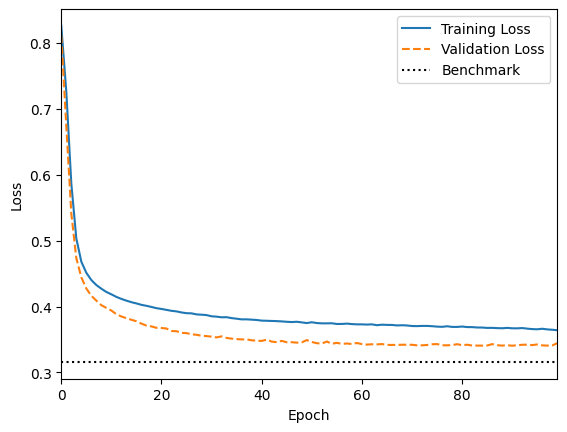

In [27]:
plot_training(epochs, train_losses, val_losses, benchmark)

## Implementing the Recurrent Neural Network in a More Compact Form with Deeplay

Define a recurrent neural network in deeplay ...

In [24]:
import deeplay as dl

# rnn_dl = dl.RecurrentModel(
#     in_features=n_features,
#     hidden_features=[2],
#     out_features=1,
#     rnn_type="RNN",
# )
# rnn_simple = dl.Regressor(rnn_dl, optimizer=dl.Adam(lr=0.001)).create()

... print out the application architecture ...

In [31]:
print(rnn_simple)

Regressor(
  (loss): L1Loss()
  (optimizer): Adam[Adam](lr=0.001)
  (train_metrics): MetricCollection,
    prefix=train
  )
  (val_metrics): MetricCollection,
    prefix=val
  )
  (test_metrics): MetricCollection,
    prefix=test
  )
  (model): RecurrentModel(
    (blocks): LayerList(
      (0): Sequence1dBlock(
        (layer): RNN(14, 2, batch_first=True)
      )
    )
    (head): MultiLayerPerceptron(
      (blocks): LayerList(
        (0): LinearBlock(
          (layer): Linear(in_features=2, out_features=1, bias=True)
          (activation): Identity()
        )
      )
    )
  )
)


... and train it.

INFO: 
  | Name          | Type             | Params | Mode 
-----------------------------------------------------------
0 | loss          | L1Loss           | 0      | train
1 | train_metrics | MetricCollection | 0      | train
2 | val_metrics   | MetricCollection | 0      | train
3 | test_metrics  | MetricCollection | 0      | train
4 | model         | RecurrentModel   | 39     | train
5 | optimizer     | Adam             | 0      | train
-----------------------------------------------------------
39        Trainable params
0         Non-trainable params
39        Total params
0.000     Total estimated model params size (MB)
14        Modules in train mode
0         Modules in eval mode
INFO:lightning.pytorch.callbacks.model_summary:
  | Name          | Type             | Params | Mode 
-----------------------------------------------------------
0 | loss          | L1Loss           | 0      | train
1 | train_metrics | MetricCollection | 0      | train
2 | val_metrics   | MetricCollec

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

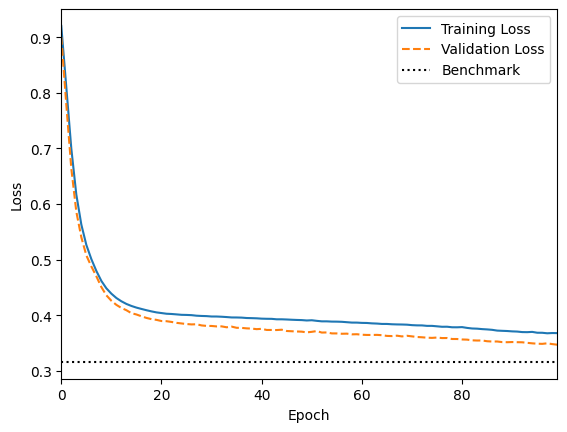

In [32]:
trainer = dl.Trainer(max_epochs=epochs, accelerator="auto")
trainer.fit(rnn_simple, train_loader, val_loader)

train_losses = trainer.history.history["train_loss_epoch"]["value"]
val_losses = trainer.history.history["val_loss_epoch"]["value"][1:]
plot_training(epochs, train_losses, val_losses, benchmark)

## Stacking Multiple Recurrent Layers

## Using Gated Recurrent Units

INFO: 
  | Name          | Type             | Params | Mode 
-----------------------------------------------------------
0 | loss          | L1Loss           | 0      | eval 
1 | train_metrics | MetricCollection | 0      | train
2 | val_metrics   | MetricCollection | 0      | train
3 | test_metrics  | MetricCollection | 0      | train
4 | model         | RecurrentModel   | 1.4 K  | train
5 | optimizer     | Adam             | 0      | train
-----------------------------------------------------------
1.4 K     Trainable params
0         Non-trainable params
1.4 K     Total params
0.006     Total estimated model params size (MB)
23        Modules in train mode
1         Modules in eval mode
INFO:lightning.pytorch.callbacks.model_summary:
  | Name          | Type             | Params | Mode 
-----------------------------------------------------------
0 | loss          | L1Loss           | 0      | eval 
1 | train_metrics | MetricCollection | 0      | train
2 | val_metrics   | MetricCollec

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

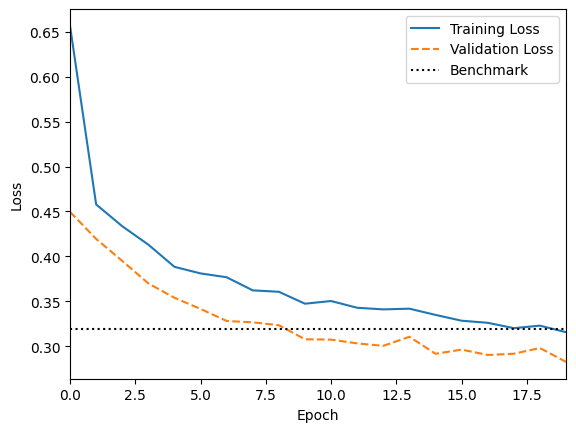

In [69]:
gru_dl = dl.RecurrentModel(
    in_features=n_features,
    hidden_features=[8, 8, 8],
    out_features=1,
    rnn_type="GRU",
    dropout=0.2,
)
gru_stacked = dl.Regressor(gru_dl, optimizer=dl.Adam(lr=0.001)).create()

trainer = dl.Trainer(max_epochs=epochs, accelerator="auto")
trainer.fit(gru_stacked, train_loader, val_loader)

train_losses = trainer.history.history["train_loss_epoch"]["value"]
val_losses = trainer.history.history["val_loss_epoch"]["value"][1:]
plot_training(epochs, train_losses, val_losses, benchmark)

In [58]:
import torch
import torch.nn as nn

class GRUWithAttention(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers=3, dropout=0.2, num_heads=1):
        super(GRUWithAttention, self).__init__()
        self.gru = nn.GRU(input_dim, hidden_dim, num_layers, batch_first=True, dropout=dropout)
        self.attention = nn.MultiheadAttention(embed_dim=hidden_dim, num_heads=num_heads, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

        self.input_proj = nn.Linear(input_dim, hidden_dim)

    def forward(self, x):
        gru_out, _ = self.gru(x)
        x_proj = self.input_proj(x)

        attn_out, attn_weights = self.attention(query=gru_out, key=x_proj, value=x_proj)


        output = self.fc(attn_out[:, -1, :])
        return output, attn_weights


In [59]:
def train_one_epoch(model, dataloader, optimizer, criterion, device):
    model.train()
    total_loss = 0

    for x, y in dataloader:
        x, y = x.to(device), y.to(device)

        y_pred, _ = model(x)
        loss = criterion(y_pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    return total_loss / len(dataloader)


def validate_one_epoch(model, dataloader, criterion, device):
    model.eval()
    total_loss = 0

    with torch.no_grad():
        for x, y in dataloader:
            x, y = x.to(device), y.to(device)

            y_pred, _ = model(x)
            loss = criterion(y_pred, y)

            total_loss += loss.item()

    return total_loss / len(dataloader)


In [60]:
def train_model(model, train_loader, val_loader, optimizer, criterion, epochs, device):
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        train_loss = train_one_epoch(model, train_loader, optimizer, criterion, device)
        val_loss = validate_one_epoch(model, val_loader, criterion, device)

        train_losses.append(train_loss)
        val_losses.append(val_loss)

        print(f"Epoch {epoch + 1}/{epochs}")
        print(f"Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")

    return train_losses, val_losses


In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_attention(model, dataloader, device, num_examples=3):
    model.eval()
    inputs, attn_weights_list = [], []

    with torch.no_grad():
        for i, (x, _) in enumerate(dataloader):
            x = x.to(device)
            _, attn_weights = model(x)

            inputs.append(x.cpu())
            attn_weights_list.append(attn_weights.cpu())


    for idx in range(num_examples):
        attn_weights = attn_weights_list[idx][0].numpy()  # (seq_len, seq_len)
        plt.figure(figsize=(10, 8))
        sns.heatmap(attn_weights, cmap="Blues", annot=False)
        plt.title(f"Attention Matrix for Example {idx + 1}")
        plt.xlabel("Key/Value Sequence")
        plt.ylabel("Query Sequence")
        plt.show()


Epoch 1/20
Train Loss: 0.2645 | Val Loss: 0.1878
Epoch 2/20
Train Loss: 0.1902 | Val Loss: 0.1713
Epoch 3/20
Train Loss: 0.1871 | Val Loss: 0.1654
Epoch 4/20
Train Loss: 0.1713 | Val Loss: 0.1613
Epoch 5/20
Train Loss: 0.1634 | Val Loss: 0.1564
Epoch 6/20
Train Loss: 0.1594 | Val Loss: 0.1740
Epoch 7/20
Train Loss: 0.1564 | Val Loss: 0.1598
Epoch 8/20
Train Loss: 0.1466 | Val Loss: 0.1484
Epoch 9/20
Train Loss: 0.1396 | Val Loss: 0.1399
Epoch 10/20
Train Loss: 0.1372 | Val Loss: 0.1442
Epoch 11/20
Train Loss: 0.1372 | Val Loss: 0.1422
Epoch 12/20
Train Loss: 0.1284 | Val Loss: 0.1381
Epoch 13/20
Train Loss: 0.1204 | Val Loss: 0.1274
Epoch 14/20
Train Loss: 0.1206 | Val Loss: 0.1343
Epoch 15/20
Train Loss: 0.1134 | Val Loss: 0.1242
Epoch 16/20
Train Loss: 0.1195 | Val Loss: 0.1492
Epoch 17/20
Train Loss: 0.1162 | Val Loss: 0.1288
Epoch 18/20
Train Loss: 0.1123 | Val Loss: 0.1238
Epoch 19/20
Train Loss: 0.1069 | Val Loss: 0.1293
Epoch 20/20
Train Loss: 0.1106 | Val Loss: 0.1309


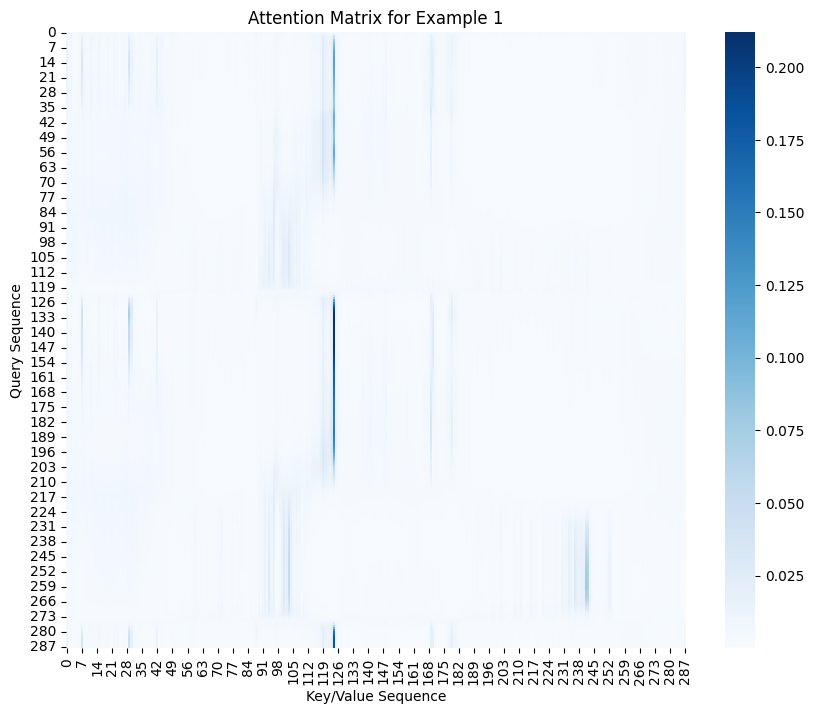

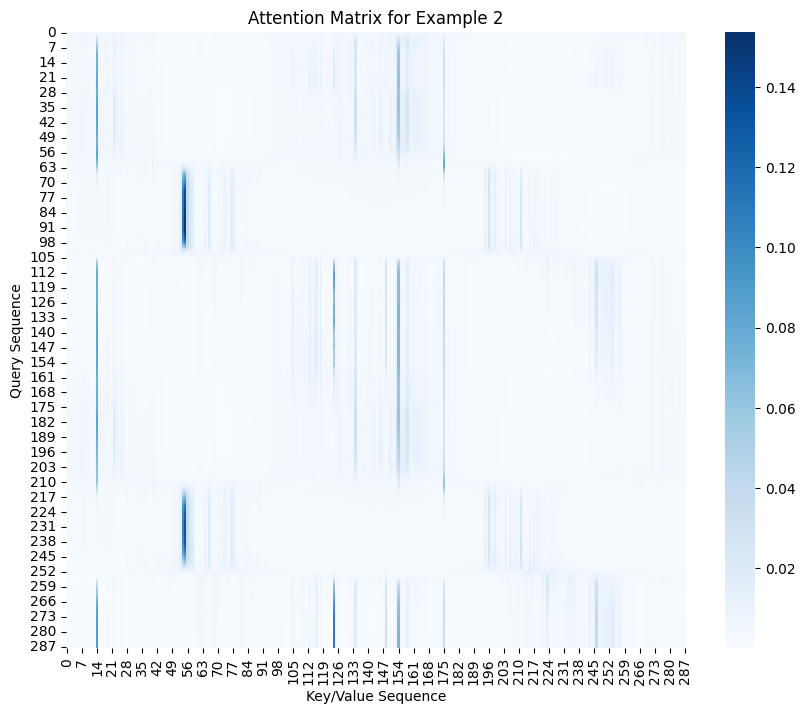

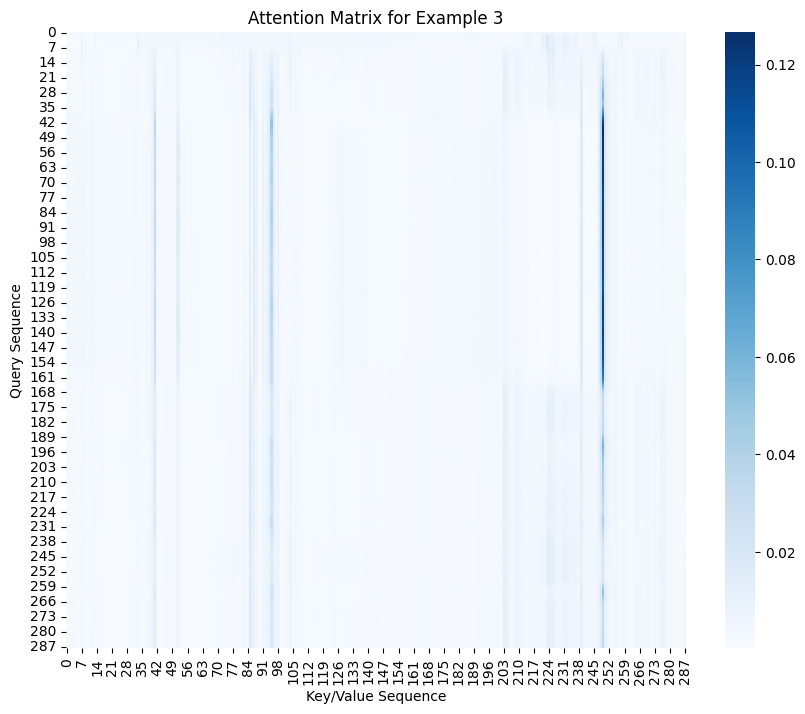

In [76]:

input_dim = n_features
hidden_dim = 64
output_dim = 1
num_layers = 3
dropout = 0.2
num_heads = 4
lr = 0.001
epochs = 20

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


model = GRUWithAttention(input_dim, hidden_dim, output_dim, num_layers, dropout, num_heads).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)


train_losses, val_losses = train_model(model, train_loader, val_loader, optimizer, criterion, epochs, device)

visualize_attention(model, val_loader, device)


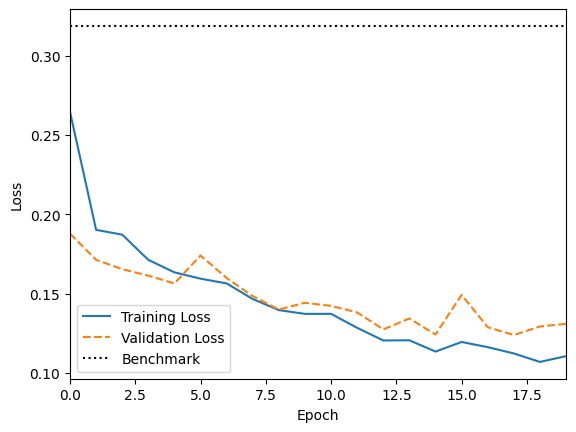

In [77]:
plot_training(epochs, train_losses, val_losses, benchmark)

## Using Long Short-Term Memory Networks